Problem 1 from learnpytorch.io, Binary Classification Model

Toy Dataset make_moons

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
samples = 1000
X, y = make_moons(n_samples=samples, noise = 0.2, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

Converstion to tensors

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

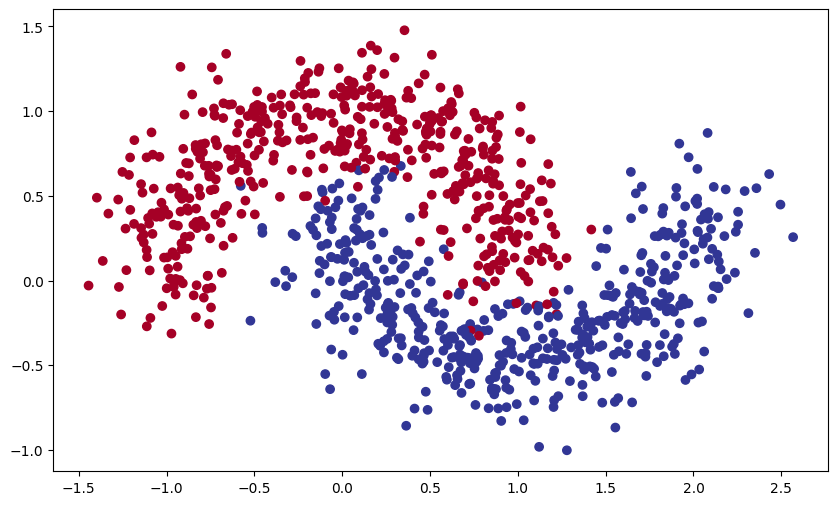

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')

In [ ]:
from torch import nn
class MoonPredictor(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x : torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
model = MoonPredictor()

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.2)

Importing analysis script

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


Accuracy function

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

Device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

In [ ]:
epochs = 1000

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"epoch : {epoch} | loss : {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

epoch : 0 | loss : 0.71228 | Acc: 50.00% | Test Loss: 0.70616 | Test Acc: 50.00%
epoch : 100 | loss : 0.28933 | Acc: 86.88% | Test Loss: 0.29240 | Test Acc: 85.50%
epoch : 200 | loss : 0.24915 | Acc: 88.88% | Test Loss: 0.24324 | Test Acc: 89.00%
epoch : 300 | loss : 0.18541 | Acc: 92.25% | Test Loss: 0.17484 | Test Acc: 92.50%
epoch : 400 | loss : 0.12968 | Acc: 95.50% | Test Loss: 0.11501 | Test Acc: 98.00%
epoch : 500 | loss : 0.10323 | Acc: 96.25% | Test Loss: 0.08603 | Test Acc: 97.00%
epoch : 600 | loss : 0.09176 | Acc: 96.25% | Test Loss: 0.07331 | Test Acc: 97.50%
epoch : 700 | loss : 0.08596 | Acc: 96.38% | Test Loss: 0.06758 | Test Acc: 97.00%
epoch : 800 | loss : 0.08215 | Acc: 96.50% | Test Loss: 0.06446 | Test Acc: 97.00%
epoch : 900 | loss : 0.07953 | Acc: 96.75% | Test Loss: 0.06250 | Test Acc: 97.00%


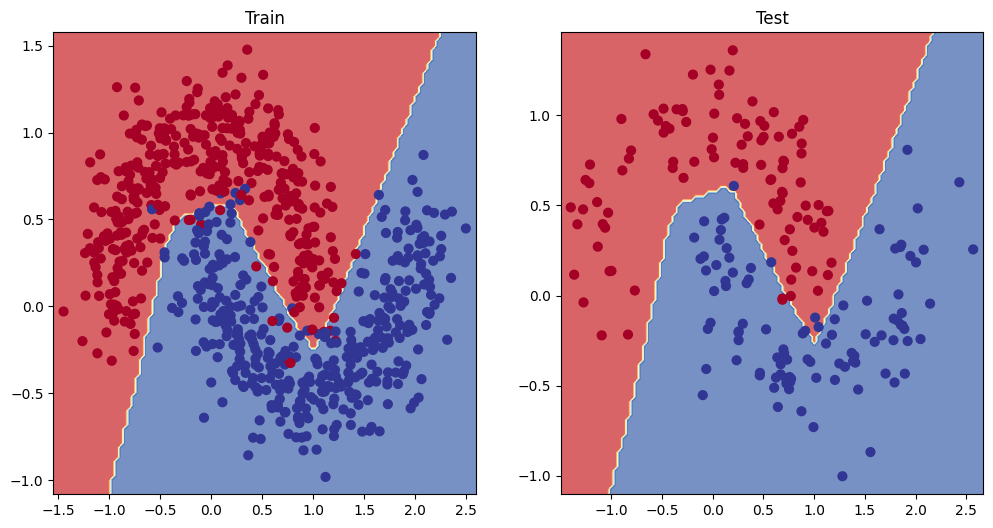

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)


Multi-class Classification problem using spirals data function from CS231n

Code below is question from learnpytorch.io

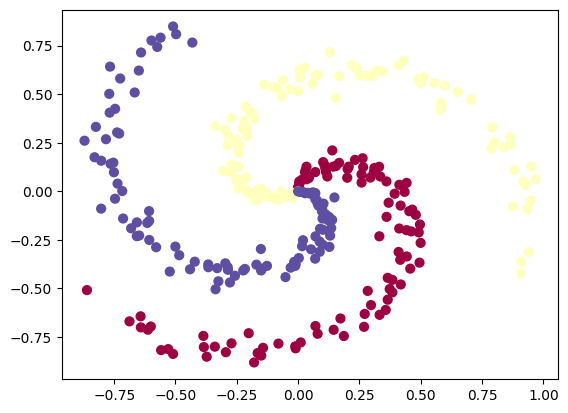

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.long)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

In [ ]:
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=4),
    )

  def forward(self, x : torch.Tensor):
    return self.linear_layer_stack(x)

model2 = SpiralModel()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model2.parameters(), lr=0.14)

In [ ]:
epochs = 1000

for epoch in range(epochs):
  model2.train()

  y_logits = model2(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"epoch : {epoch} | loss : {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

epoch : 0 | loss : 1.39761 | Acc: 32.50% | Test Loss: 1.24937 | Test Acc: 36.67%
epoch : 100 | loss : 0.11075 | Acc: 95.83% | Test Loss: 0.14857 | Test Acc: 95.00%
epoch : 200 | loss : 0.98169 | Acc: 83.33% | Test Loss: 0.42136 | Test Acc: 86.67%
epoch : 300 | loss : 0.07049 | Acc: 97.50% | Test Loss: 0.10815 | Test Acc: 95.00%
epoch : 400 | loss : 0.06151 | Acc: 97.92% | Test Loss: 0.10773 | Test Acc: 95.00%
epoch : 500 | loss : 0.05325 | Acc: 98.33% | Test Loss: 0.11589 | Test Acc: 93.33%
epoch : 600 | loss : 0.04886 | Acc: 98.75% | Test Loss: 0.09643 | Test Acc: 96.67%
epoch : 700 | loss : 0.06310 | Acc: 97.08% | Test Loss: 0.06403 | Test Acc: 96.67%
epoch : 800 | loss : 0.04344 | Acc: 98.75% | Test Loss: 0.06377 | Test Acc: 96.67%
epoch : 900 | loss : 0.04135 | Acc: 98.75% | Test Loss: 0.05613 | Test Acc: 98.33%


Great Success haha!

Now for plot decision boundary of this one

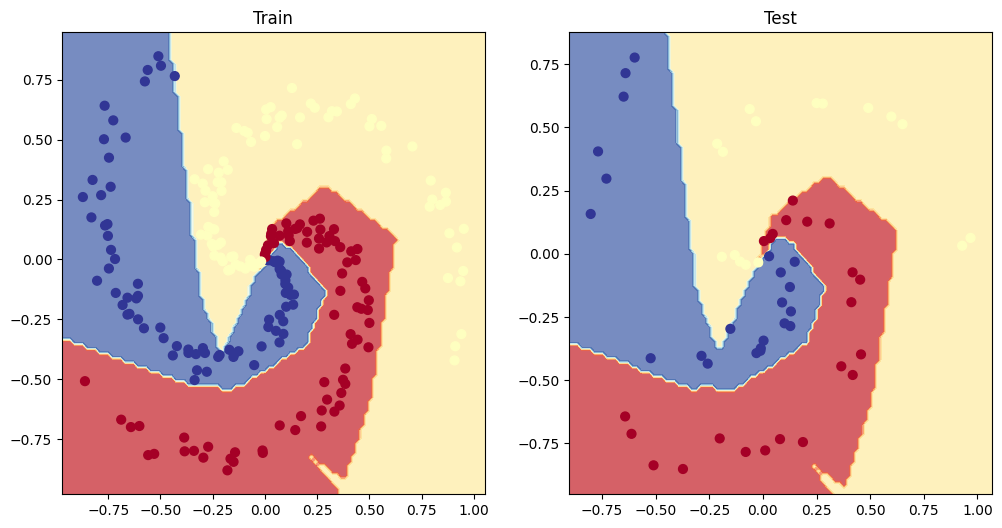

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)

## Project Summary: Binary and Multi-class Classification Models in PyTorch

This project demonstrates the implementation and training of neural network models in PyTorch for both binary and multi-class classification tasks.

**Key Highlights:**

*   **Binary Classification:**
    *   Utilized the `make_moons` dataset to create a synthetic binary classification problem.
    *   Developed a feedforward neural network (`MoonPredictor`) with ReLU activation for non-linearity.
    *   Employed `BCEWithLogitsLoss` as the loss function and SGD optimizer for training.
    *   Implemented a custom accuracy function to evaluate model performance.
    *   Trained the model for 1000 epochs, demonstrating convergence and improved accuracy.
    *   Visualized the decision boundary of the trained model on both training and testing data using a helper function.
*   **Multi-class Classification:**
    *   Used the spiral dataset generation code from CS231n to create a synthetic multi-class classification problem (3 classes).
    *   Constructed a feedforward neural network (`SpiralModel`) with a sequential stack of linear layers and ReLU activations.
    *   Applied `CrossEntropyLoss` as the loss function and the Adam optimizer for training.
    *   Trained the model for 1000 epochs, achieving high accuracy on the multi-class problem.
    *   Visualized the decision boundary of the multi-class model on training and testing data.
*   **General Practices:**
    *   Incorporated device-agnostic code to enable training on GPU if available.
    *   Split data into training and testing sets for proper model evaluation.
    *   Monitored training progress by printing loss and accuracy metrics at regular intervals.
    *   Utilized helper functions for plotting decision boundaries to visualize model performance.

This project showcases fundamental concepts in building and training neural networks with PyTorch for different types of classification problems, including data preparation, model definition, loss functions, optimizers, training loops, and evaluation.